# Analysis correlation among municipal attributes and mortality rate

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import matplotlib.dates as mdates

import util

## Loading data

In [37]:
ts_covid = pd.read_csv('data/input/df_sim_municipal.csv')[['DATA','CODIGO_MUNICIPIO_6', 'MUNICIPIO', 'TAXA_OBITOS']].copy()

In [38]:
ts_covid.DATA = pd.to_datetime(ts_covid.DATA)
ts_covid.CODIGO_MUNICIPIO_6 = ts_covid.CODIGO_MUNICIPIO_6.astype('Int64')
ts_covid = ts_covid.sort_values('DATA')
ts_covid

,DATA,CODIGO_MUNICIPIO_6,MUNICIPIO,TAXA_OBITOS
0,2020-03-12,260790,Jaboatão dos Guararapes,0.155338
3712,2020-03-12,250300,Caaporã,0.000000
3711,2020-03-12,220260,Castelo do Piauí,0.000000
3710,2020-03-12,410380,Cambira,0.000000
3709,2020-03-12,240350,Espírito Santo,0.000000
...,...,...,...,...
5697338,2022-12-31,260790,Jaboatão dos Guararapes,353.859131
5697337,2022-12-31,260392,Carnaubeira da Penha,98.047226
5697336,2022-12-31,270642,Pariconha,170.244964
5697344,2022-12-31,420290,Brusque,246.843725


In [39]:
df_base = pd.read_csv("data/output/df_base_without_missing_points.csv", index_col=0)

In [40]:
df_labeled_cluster = pd.read_csv('data/output/df_labeled_cluster.csv', index_col=0)

In [41]:
df_base['cluster_label'] = df_labeled_cluster['cluster_label']

In [42]:
df_base['CODIGO_MUNICIPIO_6'] = df_base['code_municipality_7'].astype(str).str[:6]

In [43]:
df_base.CODIGO_MUNICIPIO_6 = df_base.CODIGO_MUNICIPIO_6.astype('Int64')
df_base

,code_municipality_7,municipality,region,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,...,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18,cluster_label,CODIGO_MUNICIPIO_6
0,1100015,Alta Floresta D'Oeste (RO),Norte,21495,-11.935540,-61.999824,110001,29.276576,29.309142,26.871365,...,58.32,1.15,38.56,13.78,33.18,3.26,8.41,8.67,Semi-urbanized,110001
1,1100023,Ariquemes (RO),Norte,96833,-9.908463,-63.033269,110002,29.736763,33.135398,25.601809,...,47.19,0.16,14.97,17.99,40.06,9.10,5.92,9.18,Urbanized,110002
2,1100031,Cabixi (RO),Norte,5363,-13.499763,-60.544314,110003,27.428678,24.855491,28.305053,...,60.62,0.65,45.49,6.46,36.91,3.98,10.18,10.09,Rural with high human development,110003
3,1100049,Cacoal (RO),Norte,86895,-11.433865,-61.442944,110004,27.389378,33.099718,26.171817,...,44.93,0.43,19.69,19.00,39.07,10.43,6.29,9.74,Urbanized,110004
4,1100056,Cerejeiras (RO),Norte,15890,-13.195033,-60.818426,110005,28.445563,30.780365,26.085588,...,54.46,0.38,26.67,14.08,38.39,6.87,7.85,10.22,Urbanized,110005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis (GO),Centro-Oeste,14956,-16.742081,-48.513471,522200,27.360257,29.459749,28.450120,...,50.59,1.23,24.67,13.05,38.80,13.71,6.55,10.11,Urbanized,522200
5566,5222054,Vicentinópolis (GO),Centro-Oeste,8768,-17.732662,-49.807239,522205,28.592609,32.744069,26.881843,...,41.65,1.55,32.41,10.67,34.51,16.29,9.13,10.07,Urbanized,522205
5567,5222203,Vila Boa (GO),Centro-Oeste,4215,-15.034889,-47.057361,522220,33.618031,29.822064,24.578885,...,38.76,1.74,26.76,7.35,31.03,14.85,12.83,10.49,Semi-urbanized,522220
5568,5222302,Vila Propício (GO),Centro-Oeste,5815,-15.454635,-48.882422,522230,28.323302,26.672399,29.062769,...,62.74,0.20,47.74,5.17,28.96,6.97,14.32,9.46,Semi-urbanized,522230


In [44]:
df_dates = ts_covid[['DATA']].drop_duplicates()

In [45]:
df_dates

,DATA
0,2020-03-12
9274,2020-03-13
14836,2020-03-14
20393,2020-03-15
25955,2020-03-16
...,...
5676946,2022-12-27
5682508,2022-12-28
5688070,2022-12-29
5693633,2022-12-30


In [46]:
df_base.columns

Index(['code_municipality_7', 'municipality', 'region', 'population',
       'latitude', 'longitude', 'code_municipality_6',
       'percentage_population_age_range_0_19',
       'percentage_population_age_range_20_39',
       'percentage_population_age_range_40_59',
       'percentage_population_age_range_60_more',
       'percentage_urban_population', 'average_residents_per_households',
       'percentage_population_in_households_more_2_residents_per_bedroom',
       'percentage_male_population', 'percentage_indigenous_population',
       'percentage_black_and_brown_population', 'life_expectancy_at_birth',
       'density_median_effectively_domiciled_area', 'per_capita_income',
       'gini', 'per_capita_cash_transfer_program',
       'percentage_estimated_households_in_informal_settlements',
       'percentage_population_in_informal_settlements',
       'demographic_density_in_informal_settlements',
       'percentage_population_in_households_without_bathroom',
       'percentage_ho

In [47]:
df_base['KEY'] = 0
df_dates['KEY'] = 0
df_cross_dates_base = df_dates.merge(df_base[['KEY','CODIGO_MUNICIPIO_6', 'cluster_label','percentage_population_age_range_60_more',
       'percentage_urban_population', 'density_median_effectively_domiciled_area',
       'percentage_male_population', 'percentage_indigenous_population',
       'gini',
       'percentage_estimated_households_in_informal_settlements',       
       'demographic_density_in_informal_settlements',       
       'percentage_hospitalizations_diseases_inadequate_sanitation',
       'percentage_self_employed_workers',
       'unemployment_rate',       
       'percentage_workers_commerce',
       'percentage_workers_services', 'percentage_workers_industry',
       'expected_years_of_schooling_at_age_18']], how='outer')
df_cross_dates_base

,DATA,KEY,CODIGO_MUNICIPIO_6,cluster_label,percentage_population_age_range_60_more,percentage_urban_population,density_median_effectively_domiciled_area,percentage_male_population,percentage_indigenous_population,gini,percentage_estimated_households_in_informal_settlements,demographic_density_in_informal_settlements,percentage_hospitalizations_diseases_inadequate_sanitation,percentage_self_employed_workers,unemployment_rate,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,expected_years_of_schooling_at_age_18
0,2020-03-12,0,110001,Semi-urbanized,14.538265,57.272876,1662.200,50.45,3.484693,0.58,0.000000,0.000000,4.64,34.73,6.07,13.78,33.18,3.26,8.67
1,2020-03-12,0,110002,Urbanized,11.526029,84.695583,3418.085,49.56,0.101205,0.53,0.308684,0.000000,2.23,27.66,5.11,17.99,40.06,9.10,9.18
2,2020-03-12,0,110003,Rural with high human development,19.187022,42.658007,1566.770,50.53,0.186881,0.51,0.000000,0.000000,7.47,32.98,2.90,6.46,36.91,3.98,10.09
3,2020-03-12,0,110004,Urbanized,13.329881,78.805966,2695.100,48.96,1.942753,0.57,1.907881,0.000000,2.05,24.97,6.28,19.00,39.07,10.43,9.74
4,2020-03-12,0,110005,Urbanized,14.688483,84.673205,1956.175,49.50,0.144745,0.50,0.000000,0.000000,6.46,28.46,5.72,14.08,38.39,6.87,10.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5698995,2022-12-31,0,522200,Urbanized,14.729874,73.079375,2447.270,49.63,0.140412,0.46,0.000000,0.000000,8.29,26.44,4.03,13.05,38.80,13.71,10.11
5698996,2022-12-31,0,522205,Urbanized,11.781478,85.754986,2861.455,51.29,0.285128,0.46,0.000000,0.000000,2.09,17.41,6.23,10.67,34.51,16.29,10.07
5698997,2022-12-31,0,522220,Semi-urbanized,11.981020,73.959873,2501.470,52.05,0.189798,0.48,0.000000,0.000000,3.94,13.70,8.93,7.35,31.03,14.85,10.49
5698998,2022-12-31,0,522230,Semi-urbanized,15.941531,29.232264,1646.865,52.31,0.085985,0.47,2.278943,0.000000,1.12,23.59,4.46,5.17,28.96,6.97,9.46


In [48]:
len(df_cross_dates_base.DATA.unique())

1025

In [49]:
ts = df_cross_dates_base.merge(ts_covid[['DATA', 'CODIGO_MUNICIPIO_6','TAXA_OBITOS']], how='left', left_on=['DATA', 'CODIGO_MUNICIPIO_6'], right_on=['DATA', 'CODIGO_MUNICIPIO_6'])
ts

,DATA,KEY,CODIGO_MUNICIPIO_6,cluster_label,percentage_population_age_range_60_more,percentage_urban_population,density_median_effectively_domiciled_area,percentage_male_population,percentage_indigenous_population,gini,percentage_estimated_households_in_informal_settlements,demographic_density_in_informal_settlements,percentage_hospitalizations_diseases_inadequate_sanitation,percentage_self_employed_workers,unemployment_rate,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,expected_years_of_schooling_at_age_18,TAXA_OBITOS
0,2020-03-12,0,110001,Semi-urbanized,14.538265,57.272876,1662.200,50.45,3.484693,0.58,0.000000,0.000000,4.64,34.73,6.07,13.78,33.18,3.26,8.67,0.000000
1,2020-03-12,0,110002,Urbanized,11.526029,84.695583,3418.085,49.56,0.101205,0.53,0.308684,0.000000,2.23,27.66,5.11,17.99,40.06,9.10,9.18,0.000000
2,2020-03-12,0,110003,Rural with high human development,19.187022,42.658007,1566.770,50.53,0.186881,0.51,0.000000,0.000000,7.47,32.98,2.90,6.46,36.91,3.98,10.09,0.000000
3,2020-03-12,0,110004,Urbanized,13.329881,78.805966,2695.100,48.96,1.942753,0.57,1.907881,0.000000,2.05,24.97,6.28,19.00,39.07,10.43,9.74,0.000000
4,2020-03-12,0,110005,Urbanized,14.688483,84.673205,1956.175,49.50,0.144745,0.50,0.000000,0.000000,6.46,28.46,5.72,14.08,38.39,6.87,10.22,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5698995,2022-12-31,0,522200,Urbanized,14.729874,73.079375,2447.270,49.63,0.140412,0.46,0.000000,0.000000,8.29,26.44,4.03,13.05,38.80,13.71,10.11,314.255148
5698996,2022-12-31,0,522205,Urbanized,11.781478,85.754986,2861.455,51.29,0.285128,0.46,0.000000,0.000000,2.09,17.41,6.23,10.67,34.51,16.29,10.07,387.773723
5698997,2022-12-31,0,522220,Semi-urbanized,11.981020,73.959873,2501.470,52.05,0.189798,0.48,0.000000,0.000000,3.94,13.70,8.93,7.35,31.03,14.85,10.49,166.073547
5698998,2022-12-31,0,522230,Semi-urbanized,15.941531,29.232264,1646.865,52.31,0.085985,0.47,2.278943,0.000000,1.12,23.59,4.46,5.17,28.96,6.97,9.46,189.165950


In [50]:
ts['TAXA_OBITOS'] = ts['TAXA_OBITOS'].fillna(0)

In [51]:
ts = ts.dropna().copy()

In [52]:
ts.isna().any()

DATA                                                          False
KEY                                                           False
CODIGO_MUNICIPIO_6                                            False
cluster_label                                                 False
percentage_population_age_range_60_more                       False
percentage_urban_population                                   False
density_median_effectively_domiciled_area                     False
percentage_male_population                                    False
percentage_indigenous_population                              False
gini                                                          False
percentage_estimated_households_in_informal_settlements       False
demographic_density_in_informal_settlements                   False
percentage_hospitalizations_diseases_inadequate_sanitation    False
percentage_self_employed_workers                              False
unemployment_rate                               

In [53]:
len(ts.CODIGO_MUNICIPIO_6.unique())

5560

In [54]:
ts.columns

Index(['DATA', 'KEY', 'CODIGO_MUNICIPIO_6', 'cluster_label',
       'percentage_population_age_range_60_more',
       'percentage_urban_population',
       'density_median_effectively_domiciled_area',
       'percentage_male_population', 'percentage_indigenous_population',
       'gini', 'percentage_estimated_households_in_informal_settlements',
       'demographic_density_in_informal_settlements',
       'percentage_hospitalizations_diseases_inadequate_sanitation',
       'percentage_self_employed_workers', 'unemployment_rate',
       'percentage_workers_commerce', 'percentage_workers_services',
       'percentage_workers_industry', 'expected_years_of_schooling_at_age_18',
       'TAXA_OBITOS'],
      dtype='object')

In [55]:
selected_attributes = ['percentage_population_age_range_60_more',
                       'percentage_urban_population', 
                       'density_median_effectively_domiciled_area',
                       'percentage_male_population', 
                       'percentage_indigenous_population',
                       'gini',
                       'percentage_estimated_households_in_informal_settlements',
                       'demographic_density_in_informal_settlements',
                       'percentage_hospitalizations_diseases_inadequate_sanitation',
                       'percentage_self_employed_workers', 
                       'unemployment_rate',
                       'percentage_workers_commerce', 
                       'percentage_workers_services',
                       'percentage_workers_industry', 
                       'expected_years_of_schooling_at_age_18']

In [56]:
yticklabels = ['% population 60+ years','% urban population','Median density','% male population','% indigenous population','Gini coefficient','% IS households', 'Population density in IS', '% SRH', '% self-employed workers', 'Unemployment rate', '% commerce workers', '% service workers', '% industry workers', 'Expected years of schooling']

In [57]:
df_selected_attributes = df_base[selected_attributes].dropna()

## Correlation among attributes in time series

In [58]:
def plot_timeseries_correlations_deaths_attributes(ts=ts, analysis='general'):
    list_df_correlation = []
    
    # Calculate correlations for each attribute over time
    for attribute in selected_attributes:
        df_correlation = pd.DataFrame()
        for date in df_dates.DATA:
            df_temp = ts[ts.DATA == date]
            correlation, pvalue = spearmanr(df_temp[['TAXA_OBITOS', attribute]])
            df_temp_corr = pd.DataFrame({'date': [date], 'correlation': [correlation], 'pvalue': [pvalue]})
            df_correlation = pd.concat([df_correlation, df_temp_corr], ignore_index=True)
        list_df_correlation.append(df_correlation)
    
    # Plot settings
    myFmt = mdates.DateFormatter('%m/%Y')
    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    
    # Initialize figure and axes
    fig, ax = plt.subplots(8, 2, figsize=(util.centimeter_to_inch(34.8), util.centimeter_to_inch(34.8)), sharex=False, sharey=True)
    
    for i, df_temp in enumerate(list_df_correlation):        
        sns.scatterplot(
            data=df_temp[df_temp.pvalue < 0.05],
            x='date', y='correlation',
            color='black', markers=False, ax=ax.flatten()[i], linewidth=0.5, ec="face", label='p-value < 0.05' if i == 4 else None
        )
        sns.scatterplot(
            data=df_temp[df_temp.pvalue >= 0.05],
            x='date', y='correlation',
            color='gray', markers=False, ax=ax.flatten()[i], linewidth=0.5, ec="face", label='p-value $\geq$ 0.05' if i == 4 else None
        )
        
        # Customize subplot
        chart = ax.flatten()[i]
        chart.set_ylabel(r"$\rho$")
        chart.set_title(yticklabels[i])
        chart.axhline(0, linestyle='--', color='red')
        
        # Format x-axis
        if i >= 13:  # Apply date formatting only for the last rows
            chart.xaxis.set_major_formatter(myFmt)
            chart.set_xlabel('Month/Year')
            chart.set_xticklabels(chart.get_xticklabels(), rotation=20)  # Set x-axis tick label rotation
        else:
            # Remove x-axis tick labels for upper subplots
            chart.tick_params(labelbottom=False)
            chart.set_xlabel(None)                    
    
    # Add central legend
    fig.legend(
        ax.flatten()[4].get_legend().legendHandles,
        ['p-value < 0.05', 'p-value $\geq$ 0.05'],
        ncol=2, loc='center', frameon=True, bbox_to_anchor=(0.5, 1.01)
    )
    ax.flatten()[4].get_legend().remove()
    
    ax.flatten()[15].remove()
    
    # Final adjustments
    fig.tight_layout()
    plt.savefig(f'images/timeseries_correlations_deaths_attributes_{analysis}.pdf', bbox_inches="tight")
    plt.savefig(f'images/timeseries_correlations_deaths_attributes_{analysis}.eps', bbox_inches="tight")
    plt.show()


<ipython-input-58-4c06da49bbb4>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=20)  # Set x-axis tick label rotation
<ipython-input-58-4c06da49bbb4>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=20)  # Set x-axis tick label rotation
<ipython-input-58-4c06da49bbb4>:52: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  ax.flatten()[4].get_legend().legendHandles,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


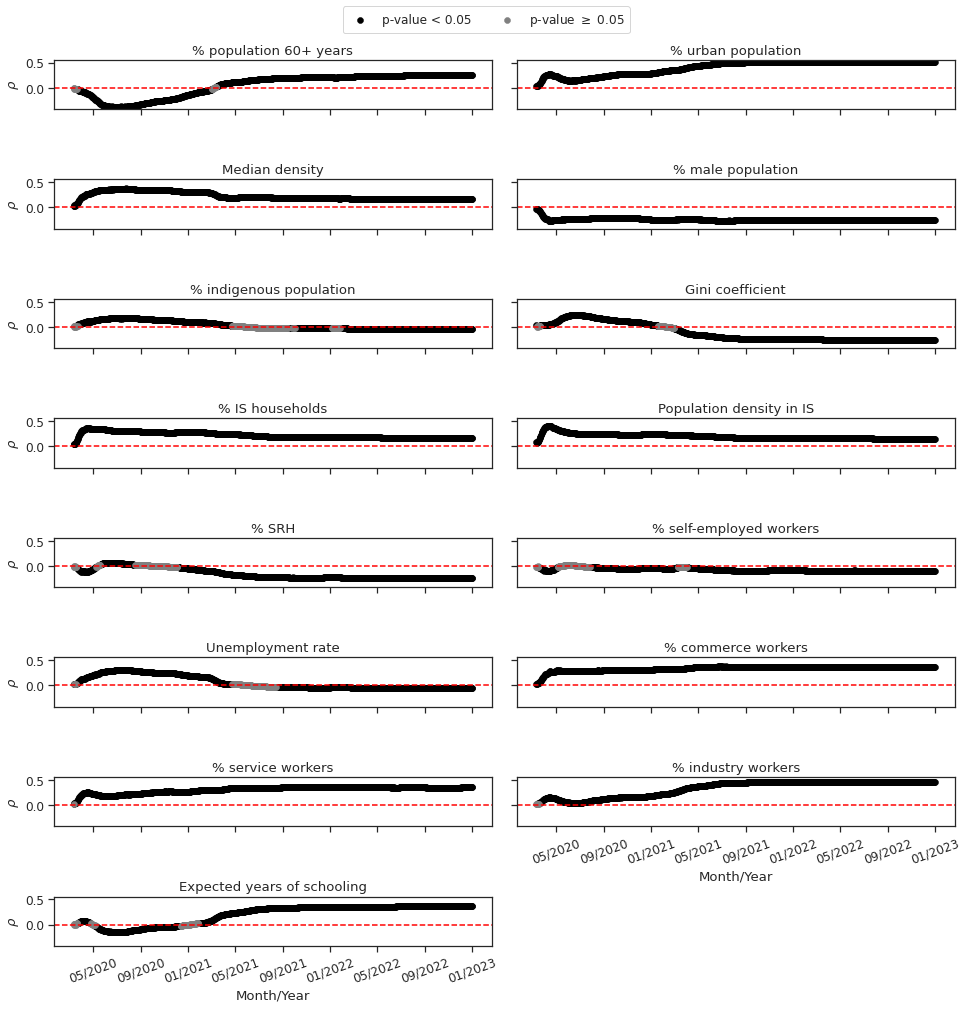

In [59]:
plot_timeseries_correlations_deaths_attributes()

In [60]:
ts['cluster_label'].unique()

array(['Semi-urbanized', 'Urbanized', 'Rural with high human development',
       'Urbanized with informal settlements',
       'Rural with low human development'], dtype=object)

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base

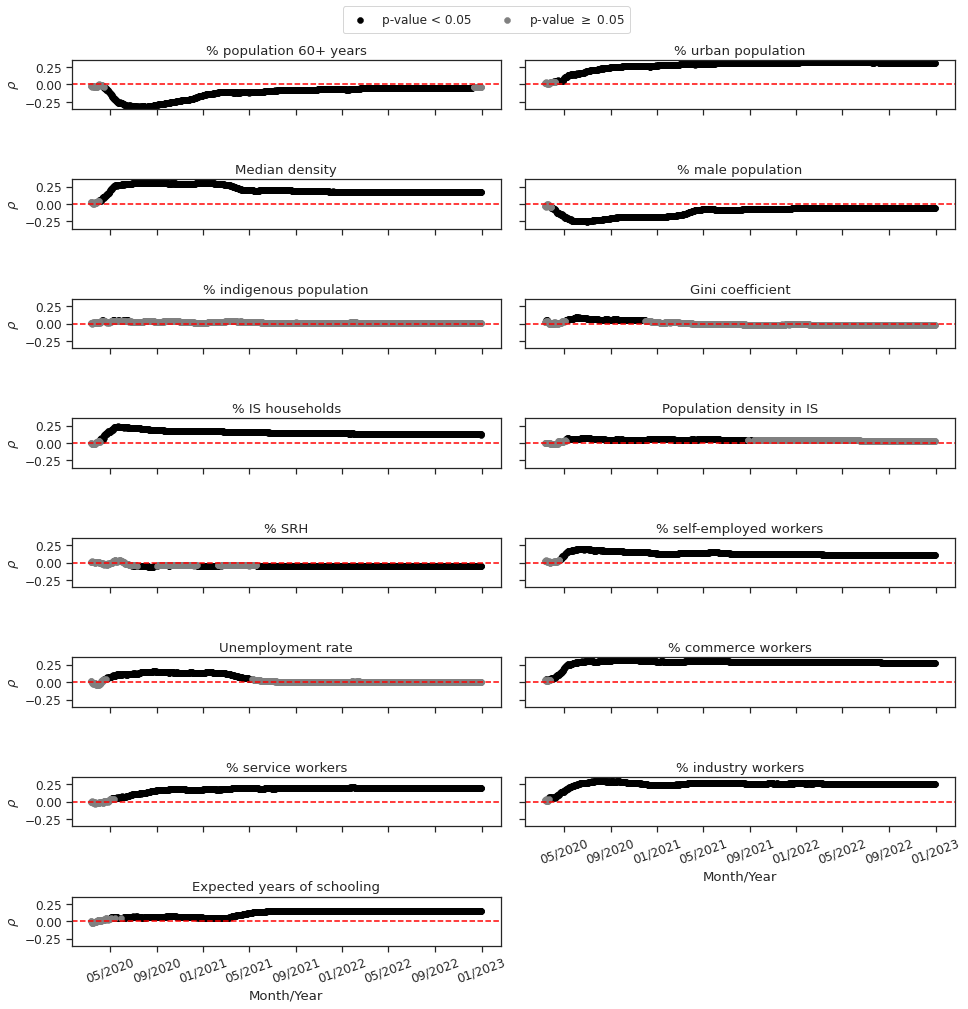

In [61]:
plot_timeseries_correlations_deaths_attributes(ts[ts['cluster_label'] == 'Semi-urbanized'], 'specific_very_low_sv')

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base

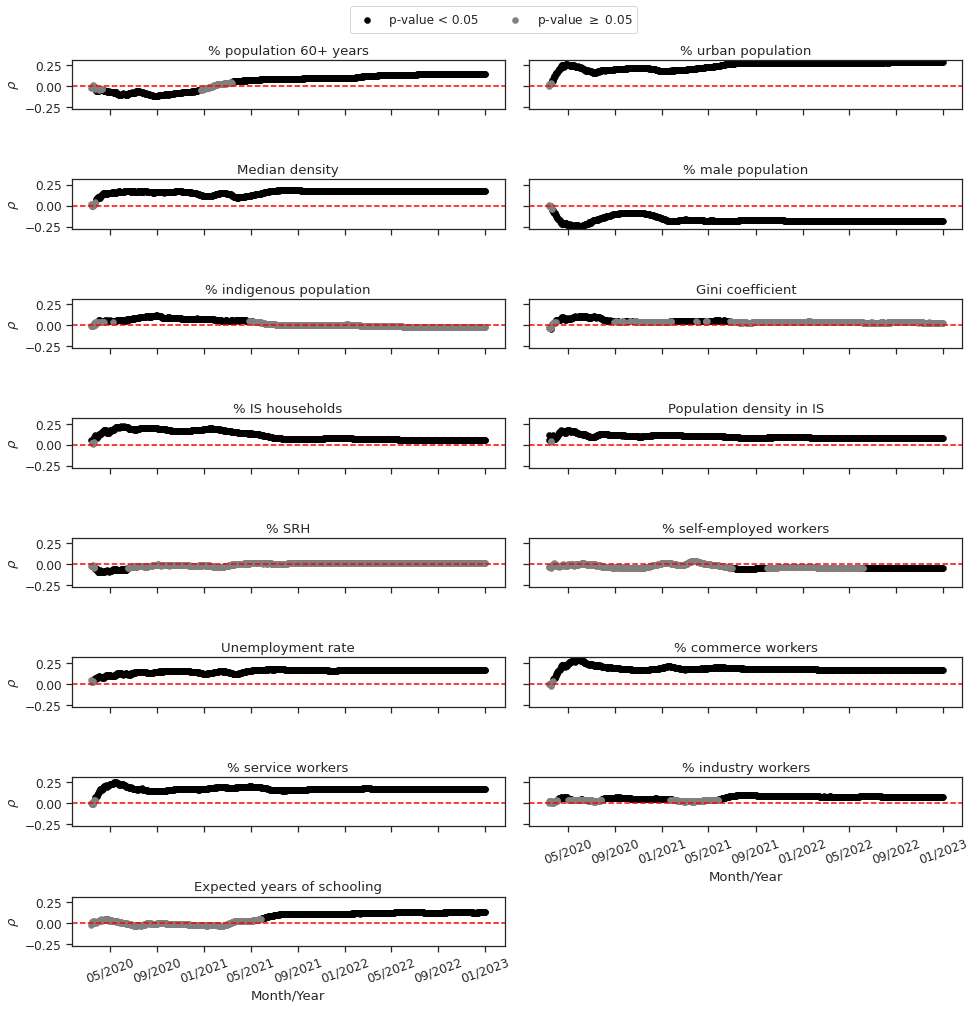

In [62]:
plot_timeseries_correlations_deaths_attributes(ts[ts['cluster_label'] == 'Urbanized'], 'specific_very_low_sv')

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base

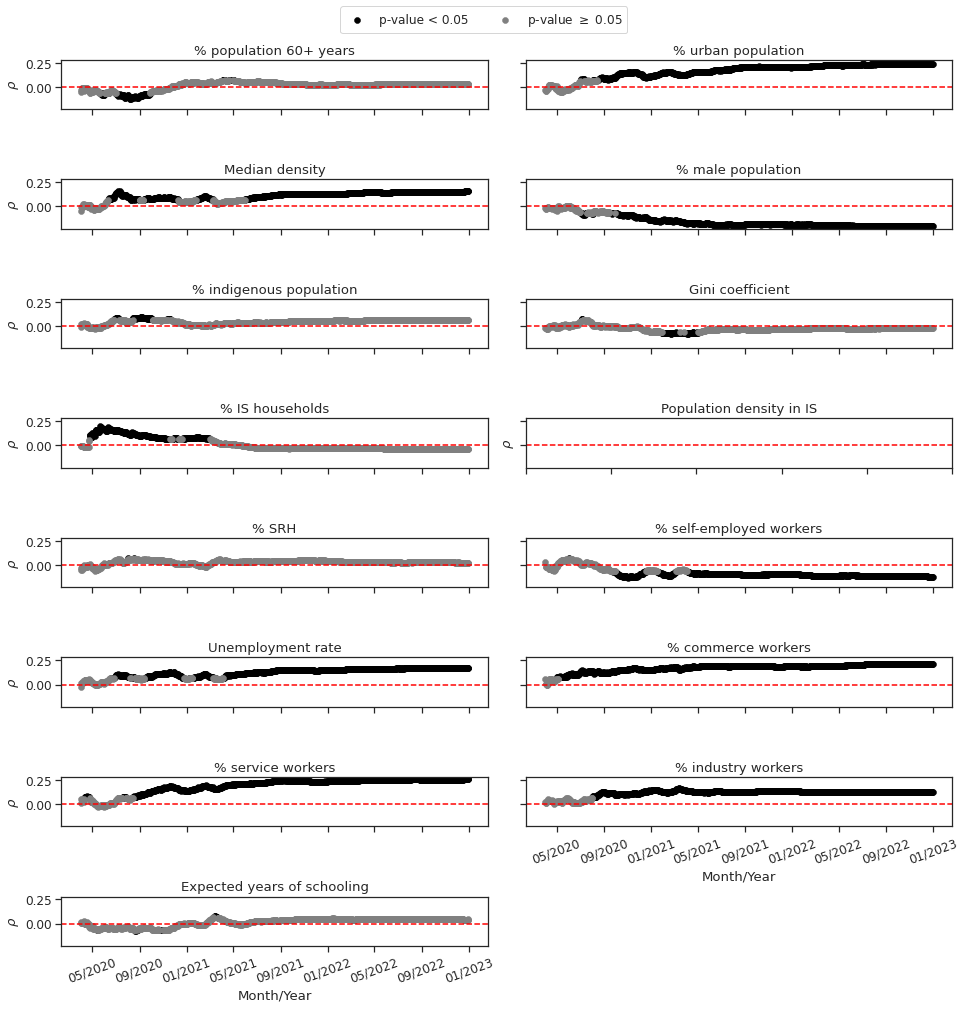

In [63]:
plot_timeseries_correlations_deaths_attributes(ts[ts['cluster_label'] == 'Rural with high human development'], 'specific_very_low_sv')

<ipython-input-58-4c06da49bbb4>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=20)  # Set x-axis tick label rotation
<ipython-input-58-4c06da49bbb4>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=20)  # Set x-axis tick label rotation
<ipython-input-58-4c06da49bbb4>:52: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  ax.flatten()[4].get_legend().legendHandles,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


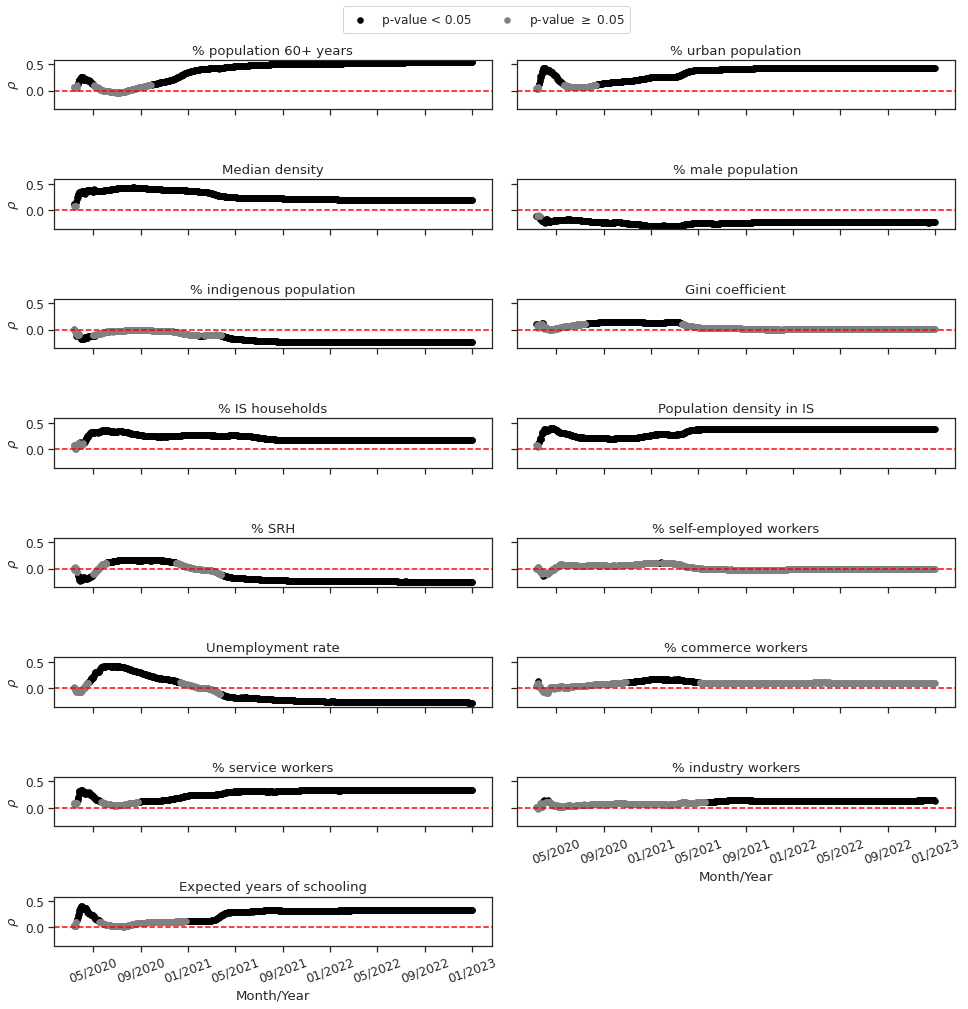

In [64]:
plot_timeseries_correlations_deaths_attributes(ts[ts['cluster_label'] == 'Urbanized with informal settlements'], 'specific_very_low_sv')

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base

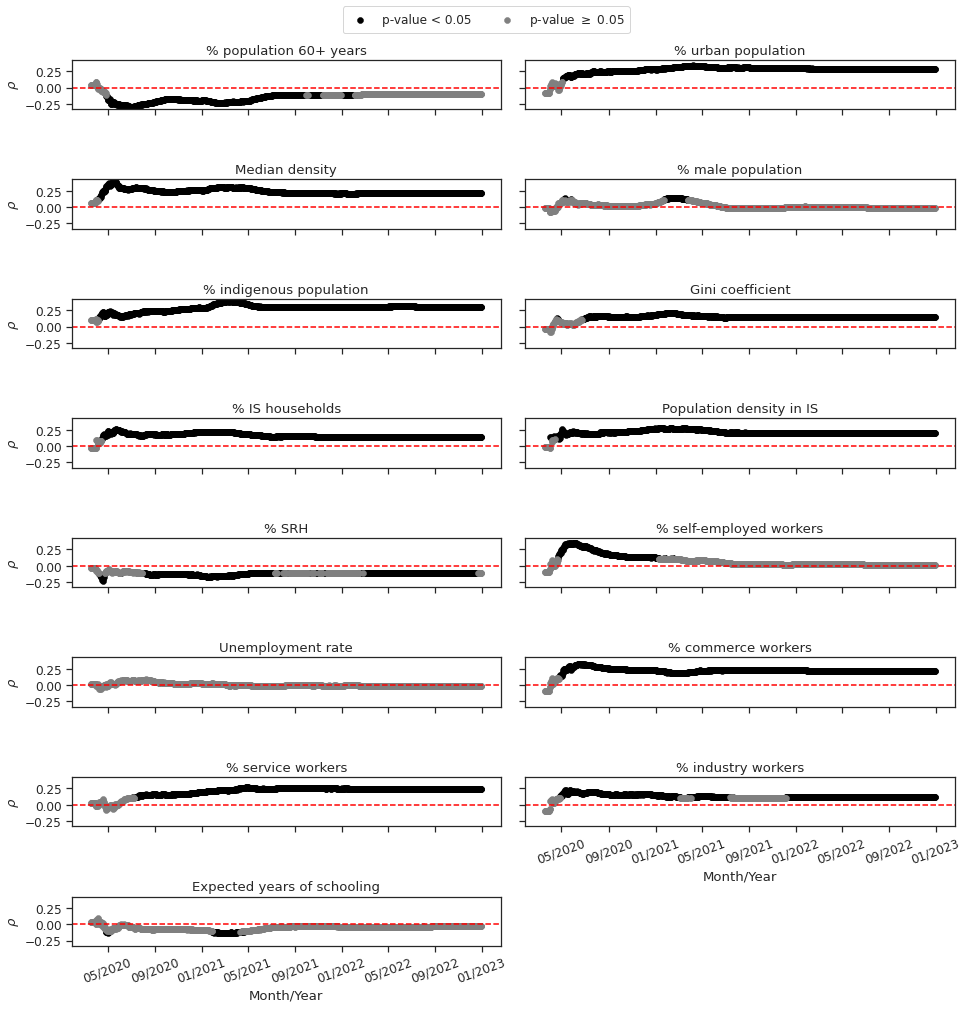

In [65]:
plot_timeseries_correlations_deaths_attributes(ts[ts['cluster_label'] == 'Rural with low human development'], 'specific_very_low_sv')

## Small multiples for all clusters and attributes 

In [66]:
ts.loc[ts['cluster_label']=='Rural with high human development', 'cluster_label'] = 'Rural with high \nhuman development'
ts.loc[ts['cluster_label']=='Urbanized with informal settlements', 'cluster_label'] = 'Urbanized with \ninformal settlements'
ts.loc[ts['cluster_label']=='Rural with low human development', 'cluster_label'] = 'Rural with low \nhuman development'

In [67]:
clusters = ts['cluster_label'].unique().tolist()
clusters

['Semi-urbanized',
 'Urbanized',
 'Rural with high \nhuman development',
 'Urbanized with \ninformal settlements',
 'Rural with low \nhuman development']

In [68]:
grops_id = ['a)', 'b)', 'c)', 'd)', 'e)']

In [69]:
matriz_df_correlation = []

for cluster in ts['cluster_label'].unique():
    list_df_correlation = []
    ts_temp = ts[ts['cluster_label'] == cluster]
    for attribute in selected_attributes:
        df_correlation = pd.DataFrame()
        for date in df_dates.DATA:
            df_temp = ts_temp[ts_temp.DATA == date]
            correlation, pvalue = spearmanr(df_temp[['TAXA_OBITOS', attribute]])
            df_temp_corr = pd.DataFrame({'date': [date], 'correlation': [correlation], 'pvalue': [pvalue]})
            df_correlation = pd.concat([df_correlation, df_temp_corr], ignore_index=True)
        list_df_correlation.append(df_correlation)
    matriz_df_correlation.append(list_df_correlation)

/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base-r/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/helder/anaconda3/envs/base

<ipython-input-70-b520935575a1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  # Set x-axis tick label rotation
<ipython-input-70-b520935575a1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  # Set x-axis tick label rotation
<ipython-input-70-b520935575a1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  # Set x-axis tick label rotation
<ipython-input-70-b520935575a1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  # Set x-axis tick label rotation
<ipython-input-70-b520935575a1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

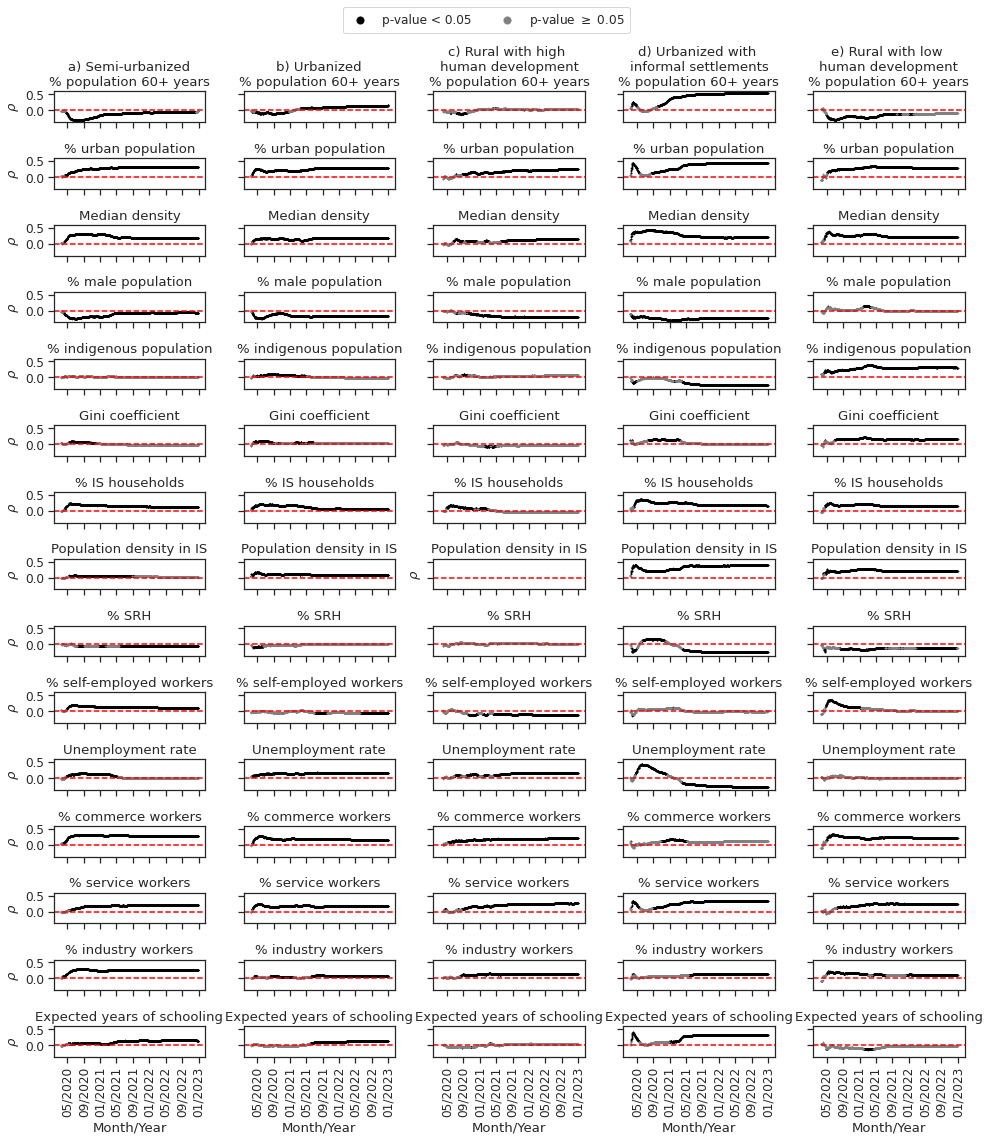

In [70]:
myFmt = mdates.DateFormatter('%m/%Y')
sns.set(font_scale=1.1)
sns.set_style("ticks")
palette = sns.dark_palette("#F2F2F2", reverse=True, as_cmap=True)

fig, ax = plt.subplots(15, 5, figsize=(util.centimeter_to_inch(34.8), util.centimeter_to_inch(39.4)), sharex=True, sharey=True)

for i, list_df_correlation in enumerate(matriz_df_correlation):
    
    for j, df_temp in enumerate(list_df_correlation):
        chart = sns.scatterplot(data=df_temp[df_temp.pvalue<0.05], x='date', y='correlation', color='black', markers=False, legend=((i==0) & (j==0)), ax=ax[j][i], s=2.5, ec="face", label='p-value < 0.05')
        sns.scatterplot(data=df_temp[df_temp.pvalue>=0.05], x='date', y='correlation', color='gray', markers=False, legend=((i==0) & (j==0)), ax=ax[j][i], s=2.5, ec="face", label='p-value $\geq$ 0.05')
    
        chart = ax[j][i]
        chart.set_ylabel(r"$\rho$")
        if j == 0:
            chart.set_title(grops_id[i] + " " + clusters[i] + "\n" + yticklabels[j])
        else:          
            chart.set_title(yticklabels[j])        
    
        chart.axhline(0, 0, 1, linestyle='--', color='red')
    
        if j == 14:  # Adjust the condition based on the position of the second column
            chart.xaxis.set_major_formatter(myFmt)
            chart.set_xlabel('Month/Year')
            chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  # Set x-axis tick label rotation

legend_kwargs = {'scatterpoints': 1, 'markerscale': 5}  # Adjust markerscale as needed
ax[0][0].legend(**legend_kwargs)  # Pass kwargs for legend

fig.legend(ax[0][0].get_legend().legendHandles,['p-value < 0.05','p-value $\geq$ 0.05'], ncol=2, loc='center', frameon=True, bbox_to_anchor=(0.5, 1.01))
ax[0][0].get_legend().remove()

fig.tight_layout()
plt.savefig('images/timeseries_correlations_deaths_attributes_small_multiples.png', bbox_inches="tight")
plt.savefig('images/timeseries_correlations_deaths_attributes_small_multiples.pdf', bbox_inches="tight")
plt.savefig('images/timeseries_correlations_deaths_attributes_small_multiples.eps', bbox_inches="tight")
plt.show()